# Preliminary analysis on TERMINET SCHN data (may 2023)

In [20]:
import pandas as pd
from scipy.stats import pearsonr

In [21]:
df1 = pd.read_csv("../data/20230319_RTU_Dataset_PPC-Lab/part1.csv", parse_dates = ["time"], index_col = ["time"])
df2 = pd.read_csv("../data/20230319_RTU_Dataset_PPC-Lab/part2.csv", parse_dates = ["time"], index_col = ["time"])

In [22]:
df1.index[-1] - df1.index[0]

Timedelta('10 days 05:01:07.020000')

In [23]:
df2.index[-1] - df2.index[0]

Timedelta('9 days 05:29:45.759000')

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

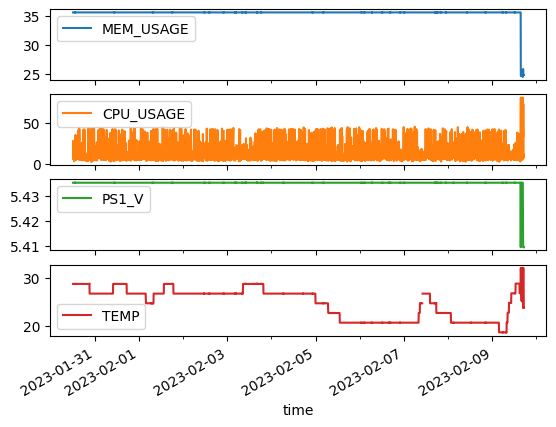

In [24]:
df1.plot(subplots=True)

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

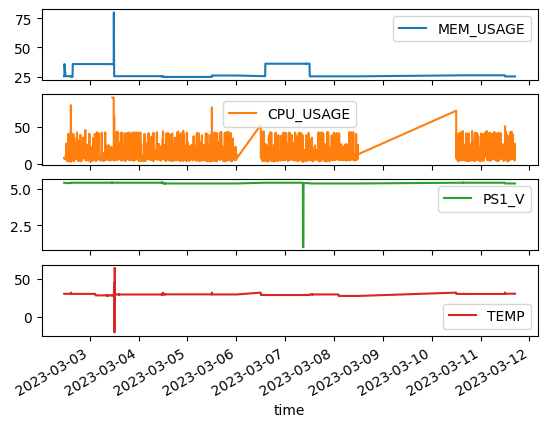

In [25]:
df2.plot(subplots=True)

## Before merging the two datasets I decided to get rid of the value after 2023-03-06 00:12:29.423 to avoid a 12h black hole

In [26]:
df2.index.get_loc("2023-03-06 00:12:29.423")

962

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

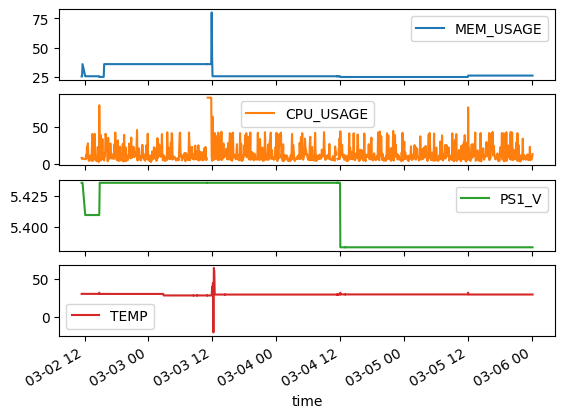

In [27]:
df2[:962].plot(subplots=True)

In [16]:
combined_df = pd.concat([df1, df2[:962]], ignore_index=True)
df = combined_df.dropna()
df.to_pickle("../data/20230319_RTU_Dataset_PPC-Lab/combined_may2023.pkl")

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

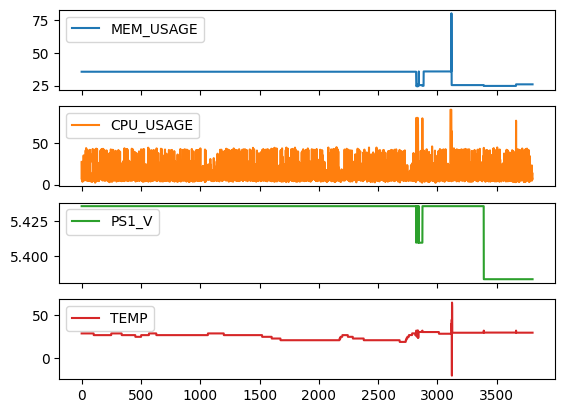

In [17]:
df.plot(subplots=True)

In [18]:
MEM_USEs = df["MEM_USAGE"].dropna()
CPUs = df["CPU_USAGE"].dropna()
PS1_Vs = df["PS1_V"].dropna()
TEMPs = df["TEMP"].dropna()
TIMEs = df.index.dropna()

In [19]:
print("len(CPUs):", len(CPUs))
print("len(MEM_USEs):", len(MEM_USEs))
print("len(PS1_Vs):", len(PS1_Vs))
print("len(TEMPs):", len(TEMPs))
print("len(TIMEs):", len(TIMEs))

len(CPUs): 3733
len(MEM_USEs): 3733
len(PS1_Vs): 3733
len(TEMPs): 3733
len(TIMEs): 3733


# Correlations

## CPU

In [61]:
print("pearsonr(CPUs, TEMPs): ", pearsonr(CPUs, TEMPs)[1])
print("pearsonr(CPUs, MEM_USEs): ", pearsonr(CPUs, MEM_USEs)[1])
print("pearsonr(CPUs, PS1_Vs): ", pearsonr(CPUs, PS1_Vs)[1])

pearsonr(CPUs, TEMPs):  0.8320156366558428
pearsonr(CPUs, MEM_USEs):  0.5319773258310633
pearsonr(CPUs, PS1_Vs):  0.4914507695709177


## MEMORY USAGE


In [62]:
print("pearsonr(MEM_USEs, TEMPs): ", pearsonr(MEM_USEs, TEMPs)[1])
print("pearsonr(MEM_USEs, PS1_Vs): ", pearsonr(MEM_USEs, PS1_Vs)[1])

pearsonr(MEM_USEs, TEMPs):  8.589174441590349e-216
pearsonr(MEM_USEs, PS1_Vs):  0.0


## PS1_vs

In [63]:
print("pearsonr(PS1_Vs, TEMPs): ", pearsonr(PS1_Vs, TEMPs)[1])

pearsonr(PS1_Vs, TEMPs):  2.0263850116798276e-121


## Conclusions from a preliminary analysis
There is no correlation with errors, since there are not errors in the dataset.
There is a strong corellation between:
- CPUs and TEMPs (0.83)

There is a weak corellation between:
- CPUs and MEM_USEs (0.53)